<a href="https://colab.research.google.com/github/valizcanos/BalanceDeMateriaYEnergia/blob/main/TransporteDeMateria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np

# **TRASPORTE DE LA MATERIA**
Los procesos de transporte trasladan los químicos desde el lugar donde se 
generaron, lo que causa un impacto lejos de la fuente de contaminación. Además, los procesos de transporte se usan para designar el tratamiento de sistemas.

##**1. Advección**
 La advección se refiere al traslado del contaminante a favor de la corriente del medio de transporte. Por ejemplo, si el viento sopla hacia el Este, la advección llevará todo contaminante presente en la atmósfera hacia el Este. De manera similar, si se vacía una bolsa de tintura  en el centro de un río, la advección llevará la mancha resultante río abajo. 

 $\dot m = J \times A$ <br>
 $J = C \times \vec V$

<p>Vamos a simular el movimiento de un contaminante por advección a traves de un ducto cuadrado cuya área se va reduciendo</p> <br>

In [41]:
VelocidadFluido = 0.15 #m/s
ConcentracionCont = 10 #g/m3

In [42]:
FluxAdv = VelocidadFluido*ConcentracionCont #g/s-m2
FluxAdv

1.5

In [43]:
Areas = np.linspace(10,0.5,10) #m2


In [44]:
mAdv = FluxAdv*Areas

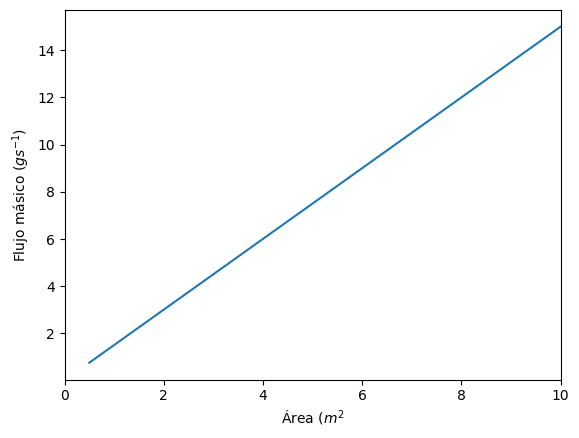

In [45]:
plt.plot(Areas,mAdv)
plt.xlim(10, 0)
plt.xlabel("Área ($m^2$")
plt.ylabel("Flujo másico (${g s^{-1}}$)")
plt.gca().invert_xaxis()

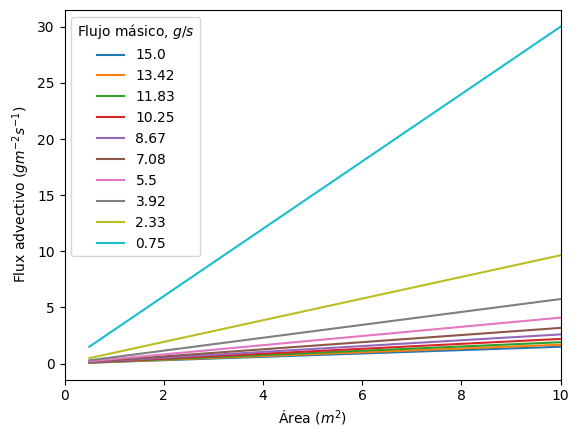

In [46]:
for i in range(len(Areas)):
  Flux = mAdv/Areas[i]
  plt.plot(Areas,Flux, label=np.round(mAdv[i],2))
  plt.legend(title = "Flujo másico, $g/s$")
  plt.xlim(10, 0)
  plt.xlabel("Área ($m^2$)")
  plt.ylabel("Flux advectivo (${g m^{-2}s^{-1}}$)")
  plt.gca().invert_xaxis()

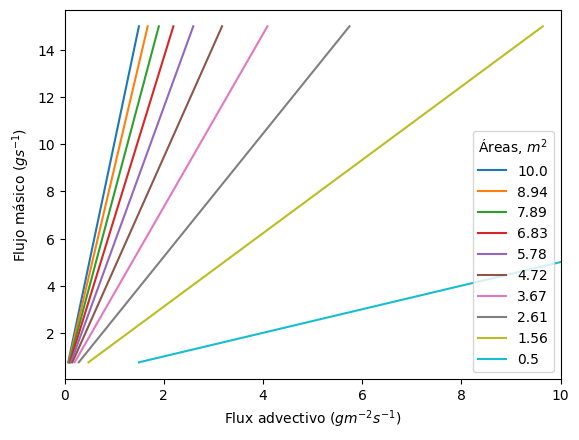

In [47]:
for i in range(len(Areas)):
  Flux = mAdv/Areas[i]
  plt.plot(Flux,mAdv, label=np.round(Areas[i],2))
  plt.legend(title = "Áreas, $m^2$")
  plt.xlim(10, 0)
  plt.xlabel("Flux advectivo (${g m^{-2}s^{-1}}$)")
  plt.ylabel("Flujo másico (${g s^{-1}}$)")
  plt.gca().invert_xaxis()

<p>Vamos a simular el movimiento de un contaminante por advección a traves de un ducto cuadrado cuya área y velocidad del fluido van cambiando</p> <br>

In [48]:
Velocidades = np.linspace(0.1,1, 10) #m/s

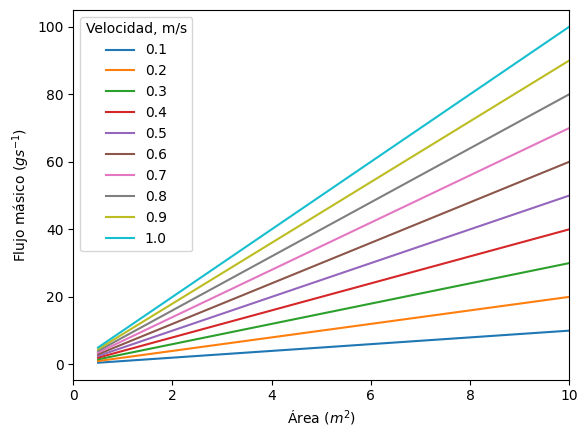

In [49]:
for i in range(10):
  FluxAdv = np.round(Velocidades[i],1)*ConcentracionCont #g/s-m2
  mAdv = FluxAdv*Areas
  plt.plot(Areas,mAdv, label=np.round(Velocidades[i],1))
  plt.xlim(10, 0)
  plt.xlabel("Área ($m^2$)")
  plt.ylabel("Flujo másico (${g s^{-1}}$)")
  plt.legend(title="Velocidad, m/s")
  plt.gca().invert_xaxis()

## **Difusión**
La difusión resulta de los movimientos aleatorios de dos  tipos: el movimiento aleatorio de las moléculas y los remolinos aleatorios que  surgen en la turbulencia del flujo. La difusión del movimiento molecular aleatorio se denomina difusión molecular; la difusión que resulta de los remolinos de turbulencia se llama difusión de turbulencia o difusión de remolinos.<br>

$J = -D \frac {dC} {dX}$

In [50]:
def difusion(C0,C,dX,D):
  dC = C0-C
  dC, dX = np.meshgrid(dC, dX)
  J = np.abs(D*(dC/dX))
  plt.contourf(dX, dC, J) 
  plt.title('Flux, masa/A*tiempo')
  plt.xlabel('Distancia')
  plt.ylabel('Concentración')
  plt.colorbar()
  plt.show()

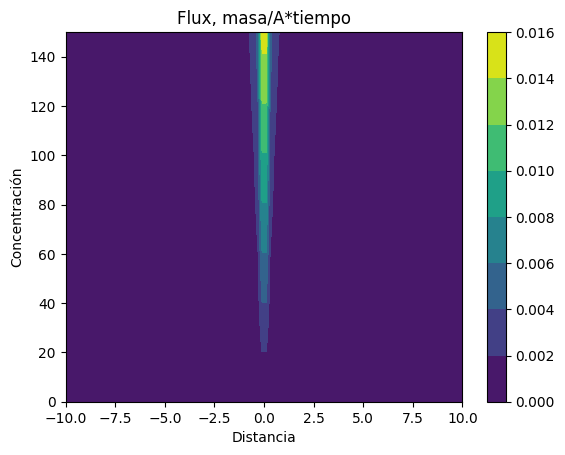

In [51]:
difusion(150, np.linspace(0,150,100),np.linspace(-10,10,100),1E-5)

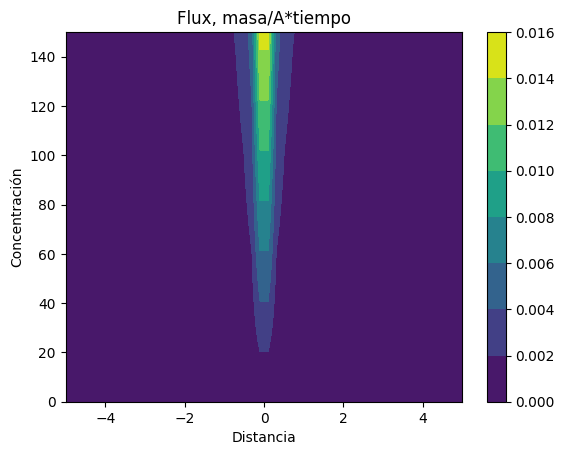

In [52]:
difusion(150, np.linspace(0,150,50),np.linspace(-5,5,50),1E-5)

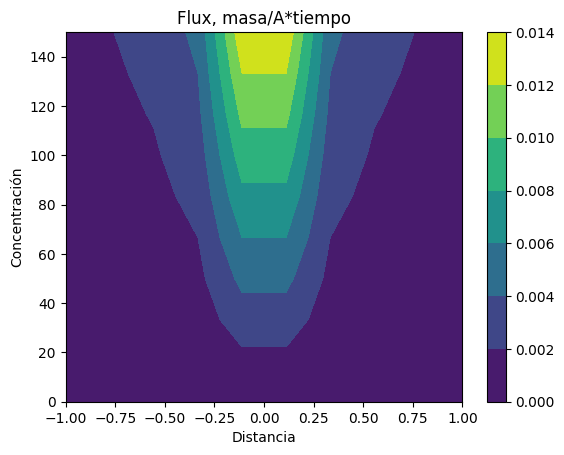

In [53]:
difusion(150, np.linspace(0,150,10),np.linspace(-1,1,10),1E-5)

In [54]:
def difusion2(C0,C,dX,D):
  dC = C0-C
  dC, dX = np.meshgrid(dC, dX)
  J = np.abs(D*(dC/dX))
  plt.contourf(dX, J, dC) 
  plt.title('Concentración, masa/volumen')
  plt.xlabel('Distancia')
  plt.ylabel('Flux, A/tiempo')
  plt.colorbar()
  plt.show()

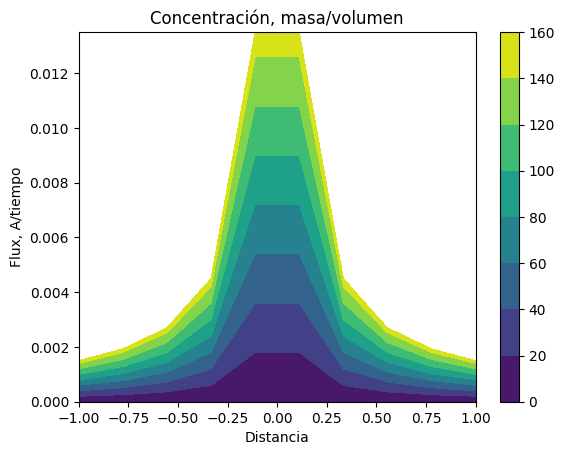

In [55]:
difusion2(150, np.linspace(0,150,10),np.linspace(-1,1,10),1E-5)

$J_{x,y,z} = -D * ∇_{C}= -D * \left( \frac{\partial C} {dX} \hat X, \frac{\partial C} {dY} \hat Y,  \frac{\partial C} {dZ} \hat Z   \right)$

$J_X = -D \frac {dC} {dX}$

$C = f(x,y,z) = 2X^2 + y^2 + z^2$

$C_{x}^{'} =  \frac {dC}{dX} = 4X$ <br>
$C_{y}^{'} = \frac {dC}{dY} = 2Y$ <br>
$C_{z}^{'} = \frac {dC}{dZ} = 2Z$ <br>

$J_{x,y,z} = -D *∇_{C}= D * \left( 4X , 2Y , 2Z \right)$

In [56]:
D = 0.1 #g/(m^2 * s)

In [57]:
x = np.linspace(0,10,100)
y = np.linspace(0,10,100)
z = np.linspace(0,10,100)

In [73]:
Jx = D * 4*x
Jy = D * 2*y

Jx, Jy = np.meshgrid(Jx, Jy)

Jz = D * 2*z *(Jx/Jx)


<ipython-input-73-0edec3757a22>:6: RuntimeWarning: invalid value encountered in true_divide
  Jz = D * 2*z *(Jx/Jx)


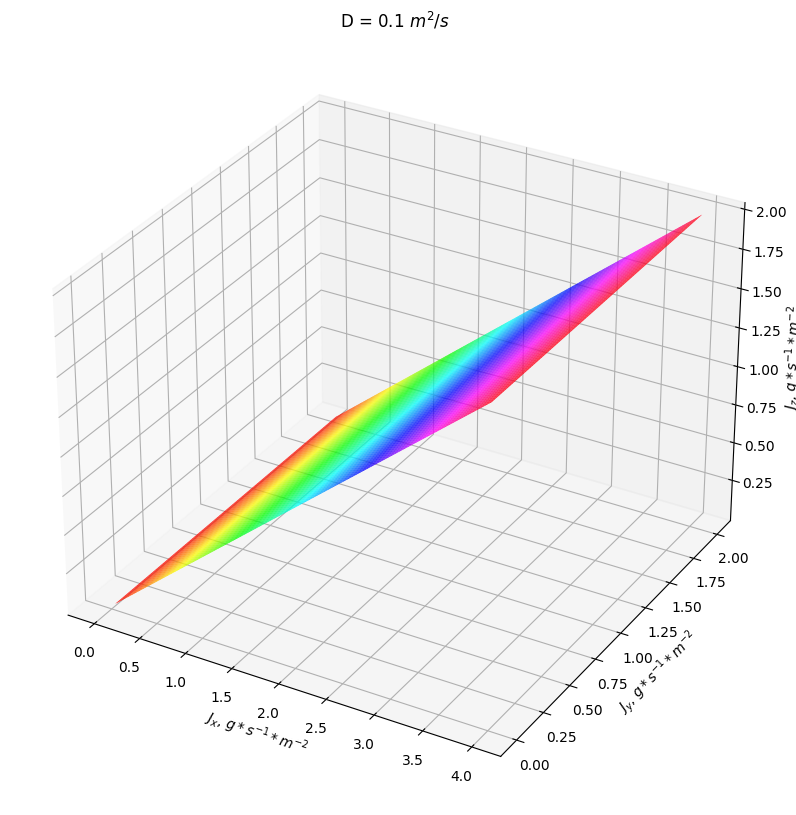

In [74]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.plot_surface(Jx, Jy, Jz, rstride=1, cstride=1,cmap='hsv', edgecolor='none')
ax.set_xlabel("$J_x$, $g*s^{-1}*m^{-2}$")
ax.set_ylabel("$J_y$, $g*s^{-1}*m^{-2}$")
ax.set_zlabel("$J_z$, $g*s^{-1}*m^{-2}$")
ax.set_title("D = 0.1 $m^2 / s$")
plt.show()

$C = f(x,y,z) = 2X^3 + y^3 + 4x^{2}y + 4xy^{2} +z^2$

$C_{x}^{'} =  \frac {dC}{dX} = 6X^{2}+8XY + 4Y^2$ <br>
$C_{y}^{'} = \frac {dC}{dY} = 3Y^{2} + 4X^{2} + 8XY$ <br>
$C_{z}^{'} = \frac {dC}{dZ} = 2Z$ <br>

$J_{x,y,z} = -D *∇_{C}= D * \left( 6X^{2}+8XY + 4Y^2 , 3Y^{2} + 4X^{2} + 8XY , 2Z \right)$

In [81]:
Jx2 = D * ((6*x**2)+(8*x*y)+(4*y**2))
Jy2 = D * ((3*y**2)+(4*x**2)+(8*x*y))
Jx2,Jy2 = np.meshgrid(Jx2, Jy2)
Jz2 = D * (2*z) * (Jy2/Jy2)

<ipython-input-81-d3010f28c82f>:4: RuntimeWarning: invalid value encountered in true_divide
  Jz2 = D * (2*z) * (Jy2/Jy2)


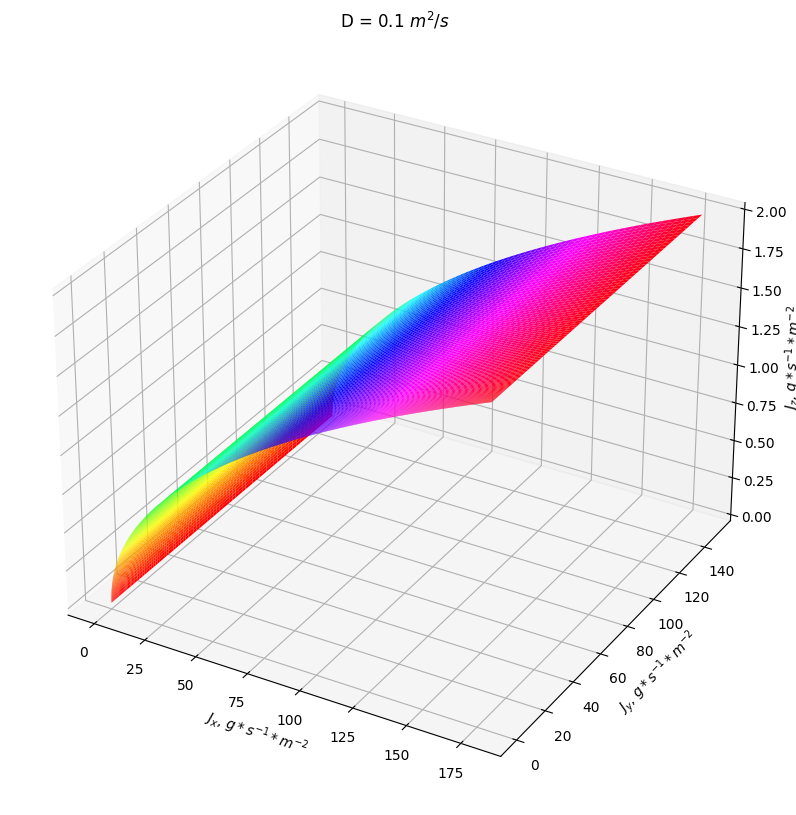

In [84]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.plot_surface(Jx2, Jy2, Jz2, rstride=1, cstride=1,cmap='hsv', edgecolor='none')

ax.set_xlabel("$J_x$, $g*s^{-1}*m^{-2}$")
ax.set_ylabel("$J_y$, $g*s^{-1}*m^{-2}$")
ax.set_zlabel("$J_z$, $g*s^{-1}*m^{-2}$")
ax.set_title("D = 0.1 $m^2 / s$")
plt.show()

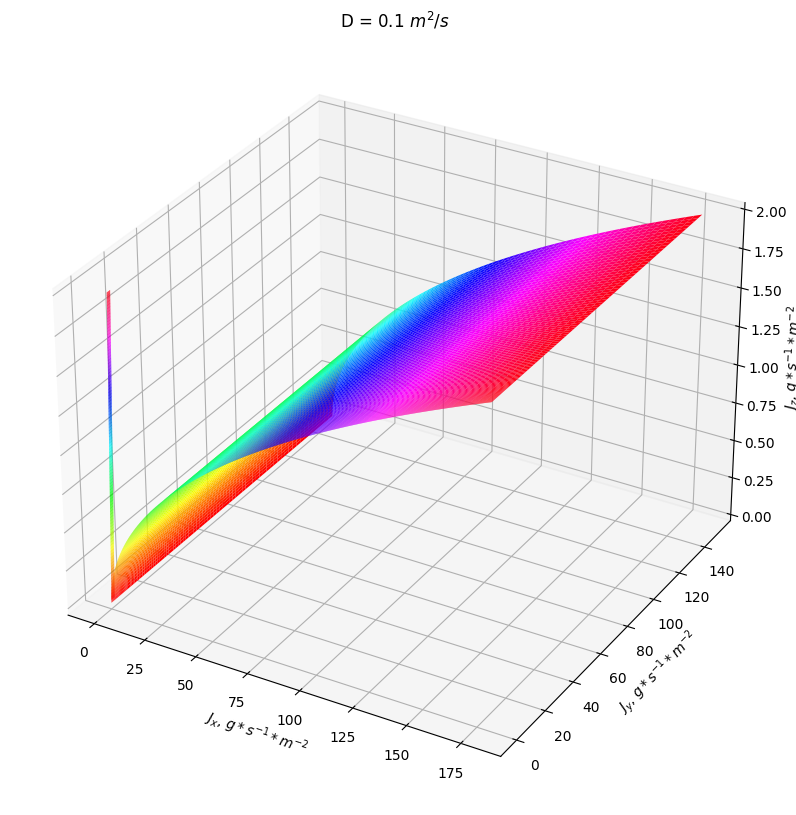

In [85]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.plot_surface(Jx2, Jy2, Jz2, rstride=1, cstride=1,cmap='hsv', edgecolor='none')
ax.plot_surface(Jx, Jy, Jz, rstride=1, cstride=1,cmap='hsv', edgecolor='none')
ax.set_xlabel("$J_x$, $g*s^{-1}*m^{-2}$")
ax.set_ylabel("$J_y$, $g*s^{-1}*m^{-2}$")
ax.set_zlabel("$J_z$, $g*s^{-1}*m^{-2}$")
ax.set_title("D = 0.1 $m^2 / s$")
plt.show()

In [93]:
Di = np.array([0.1,0.2,0.3,0.4])

Jx0 = Di[0] * ((6*x**2)+(8*x*y)+(4*y**2))
Jy0 = Di[0] * ((3*y**2)+(4*x**2)+(8*x*y))
Jx0,Jy0 = np.meshgrid(Jx0, Jy0)
Jz0 = Di[0] * (2*z) * (Jy0/Jy0)

Jx1 = Di[1] * ((6*x**2)+(8*x*y)+(4*y**2))
Jy1 = Di[1] * ((3*y**2)+(4*x**2)+(8*x*y))
Jx1,Jy1 = np.meshgrid(Jx1, Jy1)
Jz1 = Di[1] * (2*z) * (Jy1/Jy1)

Jx2 = Di[2] * ((6*x**2)+(8*x*y)+(4*y**2))
Jy2 = Di[2] * ((3*y**2)+(4*x**2)+(8*x*y))
Jx2,Jy2 = np.meshgrid(Jx2, Jy2)
Jz2 = Di[2] * (2*z) * (Jy2/Jy2)

Jx3 = Di[3] * ((6*x**2)+(8*x*y)+(4*y**2))
Jy3 = Di[3] * ((3*y**2)+(4*x**2)+(8*x*y))
Jx3,Jy3 = np.meshgrid(Jx3, Jy3)
Jz3 = Di[3] * (2*z) * (Jy3/Jy3)


<ipython-input-93-0d15463615ab>:6: RuntimeWarning: invalid value encountered in true_divide
  Jz0 = Di[0] * (2*z) * (Jy0/Jy0)
<ipython-input-93-0d15463615ab>:11: RuntimeWarning: invalid value encountered in true_divide
  Jz1 = Di[1] * (2*z) * (Jy1/Jy1)
<ipython-input-93-0d15463615ab>:16: RuntimeWarning: invalid value encountered in true_divide
  Jz2 = Di[2] * (2*z) * (Jy2/Jy2)
<ipython-input-93-0d15463615ab>:21: RuntimeWarning: invalid value encountered in true_divide
  Jz3 = Di[3] * (2*z) * (Jy3/Jy3)


Text(0.5, 0, '$J_z$, $g*s^{-1}*m^{-2}$')

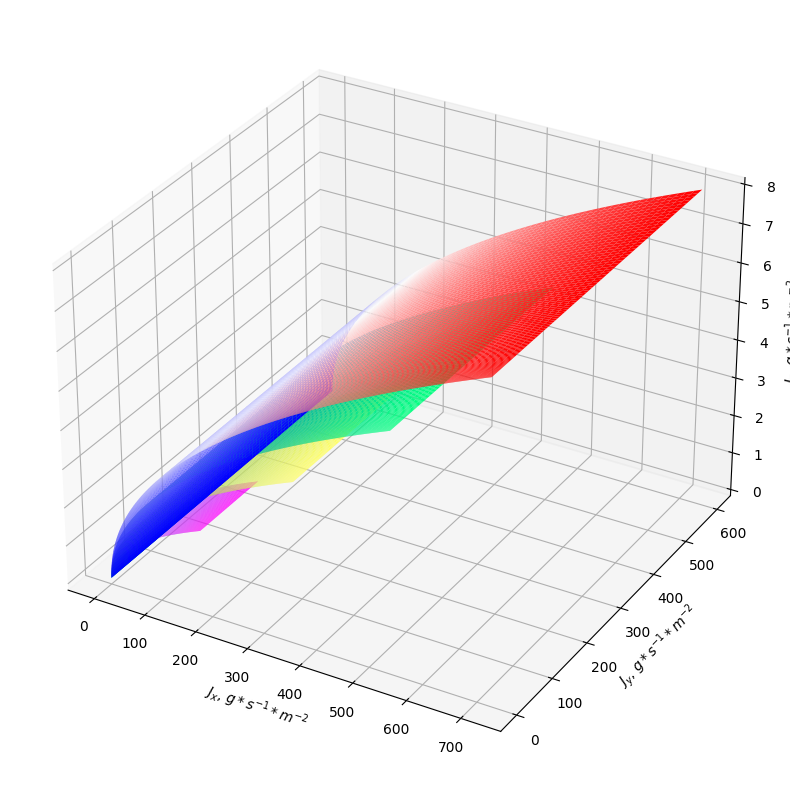

In [96]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.plot_surface(Jx0, Jy0, Jz0, rstride=1, cstride=1,cmap='cool', edgecolor='none')
ax.plot_surface(Jx1, Jy1, Jz1, rstride=1, cstride=1,cmap='summer', edgecolor='none')
ax.plot_surface(Jx2, Jy2, Jz2, rstride=1, cstride=1,cmap='winter', edgecolor='none')
ax.plot_surface(Jx3, Jy3, Jz3, rstride=1, cstride=1,cmap='bwr', edgecolor='none')
ax.set_xlabel("$J_x$, $g*s^{-1}*m^{-2}$")
ax.set_ylabel("$J_y$, $g*s^{-1}*m^{-2}$")
ax.set_zlabel("$J_z$, $g*s^{-1}*m^{-2}$")
#ax.set_title("$m^2 / s$")plt.show()